# Exercise: Build a confusion matrix


In this exercise, we go into more detail on measuring the performance of classification models, using the concepts of *imbalanced datasets*, *accuracy* and *confusion matrices*.


## Data visualization

Our new dataset represents different classes of objects found in snow.

Let's start this exercise by loading in and having a look at our data:

In [1]:
import pandas
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/snow_objects.csv

#Import the data from the .csv file
url ="https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/snow_objects.csv"
dataset = pandas.read_csv(url, delimiter="\t")

#Let's have a look at the data
dataset

,size,roughness,color,motion,label
0,50.959361,1.318226,green,0.054290,tree
1,60.008521,0.554291,brown,0.000000,tree
2,20.530772,1.097752,white,1.380464,tree
3,28.092138,0.966482,grey,0.650528,tree
4,48.344211,0.799093,grey,0.000000,tree
...,...,...,...,...,...
2195,1.918175,1.182234,white,0.000000,animal
2196,1.000694,1.332152,black,4.041097,animal
2197,2.331485,0.734561,brown,0.961486,animal
2198,1.786560,0.707935,black,0.000000,animal


## Data Exploration

We can see that the dataset has both continuous (`size`, `roughness`, `motion`) and categorical data (`color` and `label`).
Let's do some quick data exploration and see what different label classes we have and their respective counts:

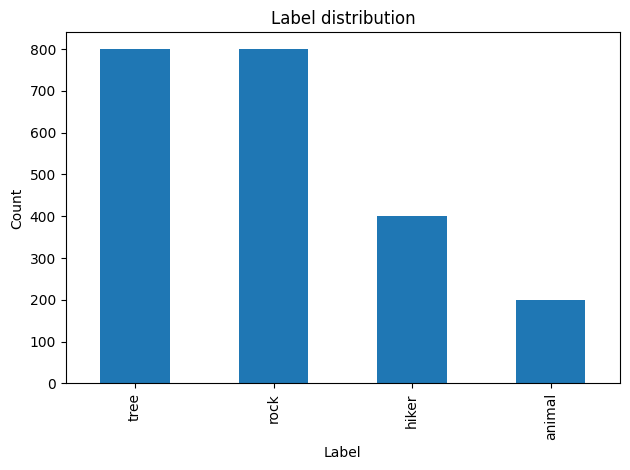

In [2]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each label
label_counts = dataset['label'].value_counts()

# Plot the histogram
label_counts.plot(kind='bar')

plt.title("Label distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The preceding histogram makes it very easy to understand both the labels we have in the dataset and their distribution.

One important bit of information to notice is that this is an *imbalanced dataset*: classes are not represented in the same proportion (we have 4 times more rocks and trees than animals, for example).

This is relevant because imbalanced sets are very common "in the wild." In the future, we learn how to address that to build better models.

We can do the same analysis for the `color` feature:

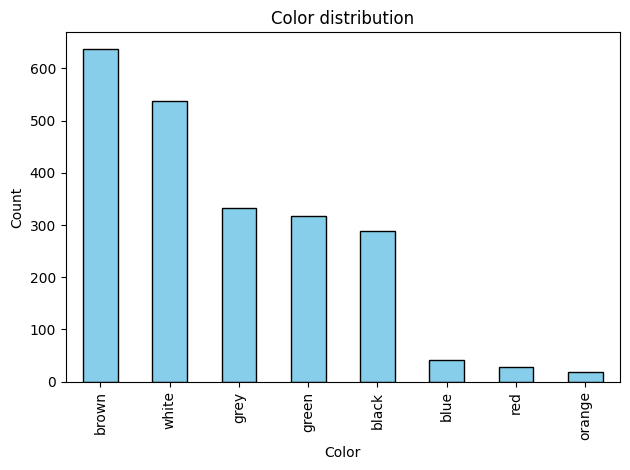

In [3]:
# Plot a histogram with counts for each label
color_counts = dataset['color'].value_counts()

# Plot the histogram
color_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Color distribution")
plt.xlabel("Color")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

We can notice that:

- We have `8` different color categories.
- The `color` feature is also heavily imbalanced.
- Out plotting algorithm is not smart enough to assign the correct colors to their respective names.

Let's see what we can find about the other features:


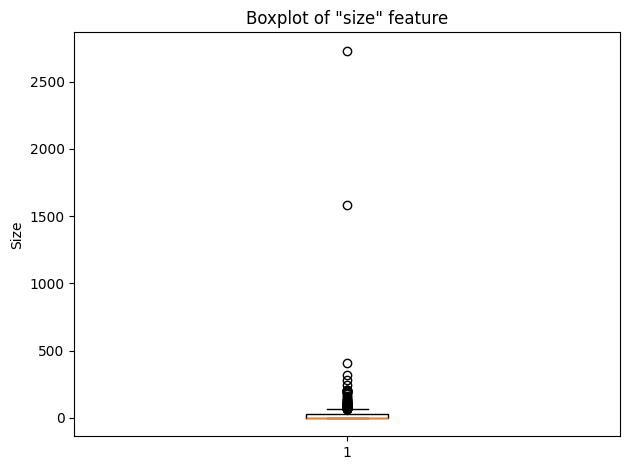

In [4]:
plt.boxplot(dataset['size'].dropna(), vert=True)

plt.title('Boxplot of "size" feature')
plt.ylabel('Size')
plt.tight_layout()
plt.show()

In the preceding box plot, we notice that the majority of our samples are relatively small, with sizes ranging from `0` to `70`, but we have a few much bigger outliers.

Let's take a look at the `roughness` feature:

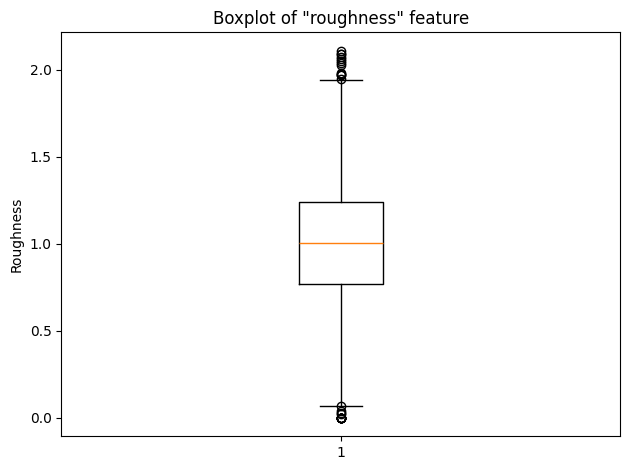

In [5]:
plt.boxplot(dataset['roughness'].dropna(), vert=True)

plt.title('Boxplot of "roughness" feature')
plt.ylabel('Roughness')
plt.tight_layout()
plt.show()

There's not a lot of variation here: values for `roughness` range from `0` to a little over `2`, with most samples having values close to the mean.

Finally, let's plot the `motion` feature:

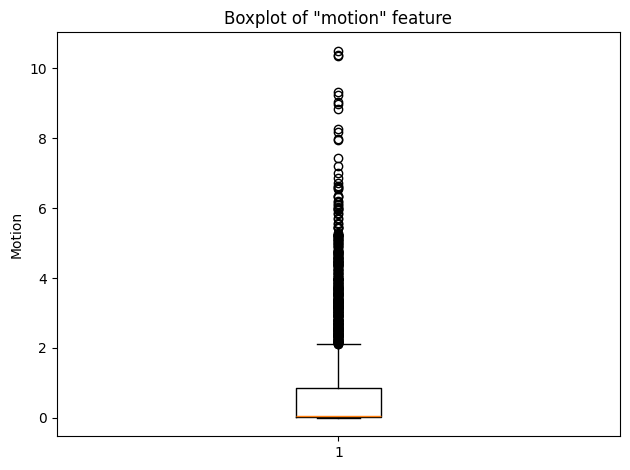

In [6]:
plt.boxplot(dataset['motion'].dropna(), vert=True)

plt.title('Boxplot of "motion" feature')
plt.ylabel('Motion')
plt.tight_layout()
plt.show()

Most objects seem to be either static or moving very slowly. There's a smaller number of objects moving faster, with a couple of outliers over `10`.

From the preceding data, one could assume that the smaller and faster objects are likely hikers and animals, whereas the bigger, more static elements are trees and rocks.

## Building a classification model

Let's build and train a classification model using a random forest to predict the class of an object based on the features in our dataset:


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset in an 70/30 train/test ratio. 
train, test = train_test_split(dataset, test_size=0.3, random_state=2)
print(train.shape)
print(test.shape)

(1540, 5)
(660, 5)


Now we can train our model, using the `train` dataset we've just created:

In [8]:
# Create the model
model = RandomForestClassifier(n_estimators=1, random_state=1, verbose=False)

# Define which features are to be used (leave color out for now)
features = ["size", "roughness", "motion"]

# Train the model
model.fit(train[features], train.label)

print("Model trained!")

Model trained!


## Assessing our model

We can now use our newly trained model to make predictions using the *test* set.

By comparing the values predicted to the actual labels (also called *true* values), we can measure the model's performance using different *metrics*.

*Accuracy*, for example, is simply the number of correctly predicted labels out of all predictions performed:

```sh
    Accuracy = Correct Predictions / Total Predictions
```

Let's see how this can be done in code:

In [9]:
# Import a function that measures a models accuracy
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the TEST set
actual = test.label
predictions = model.predict(test[features])

# Return accuracy as a fraction
acc = accuracy_score(actual, predictions)

# Return accuracy as a number of correct predictions
acc_norm = accuracy_score(actual, predictions, normalize=False)

print(f"The random forest model's accuracy on the test set is {acc:.4f}.")
print(f"It correctly predicted {acc_norm} labels in {len(test.label)} predictions.")

The random forest model's accuracy on the test set is 0.8924.
It correctly predicted 589.0 labels in 660 predictions.


Our model __seems__ to be doing quite well!

That intuition, however, can be misleading:

- Accuracy does not take into account the __wrong__ predictions made by the model.

- It's also not very good at painting a clear picture in *class-imbalanced datasets*, like ours, where the number of possible classes is not evenly distributed. Recall that we have 800 trees, 800 rocks, but only 200 animals.

## Building a confusion matrix

A *confusion matrix* is a table where we compare the actual labels to what the model predicted. It gives us a more detailed understanding of how the model is doing and where it's getting things right or missing.

This is one of the ways we can do that in code:

In [10]:
# sklearn has a very convenient utility to build confusion matrices
from sklearn.metrics import confusion_matrix

# Build and print our confusion matrix, using the actual values and predictions 
# from the test set, calculated in previous cells
cm = confusion_matrix(actual, predictions, normalize=None)

print("Confusion matrix for the test set:")
print(cm)


Confusion matrix for the test set:
[[ 28  38   0   0]
 [ 30 103   1   0]
 [  0   1 217   1]
 [  0   0   0 241]]


While the preceding matrix can be useful in calculations, it's not very helpful or intuitive.

Let's add a plot with labels and colors to turn that data into actual insights:

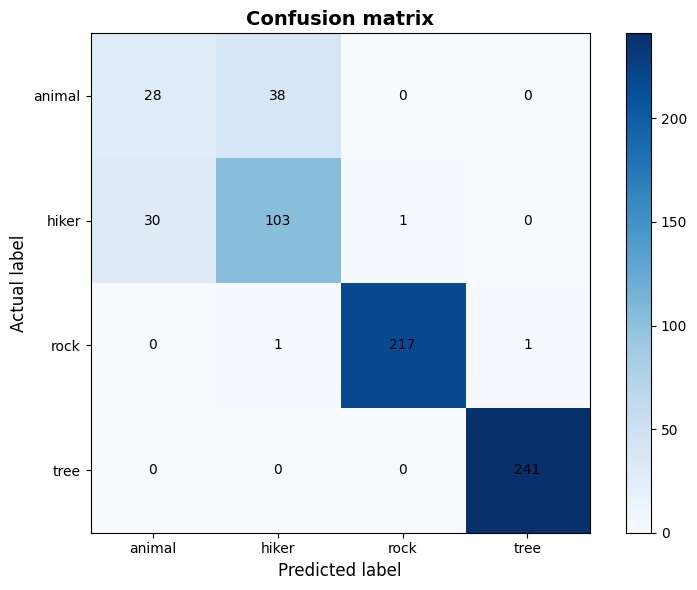

In [11]:
import numpy as np

# Create sorted list of unique labels
labels = sorted(list(test["label"].unique()))

fig, ax = plt.subplots(figsize=(8, 6))

# Show the confusion matrix
cax = ax.imshow(cm, interpolation='nearest', cmap='Blues')

# Add colorbar
fig.colorbar(cax)

# Annotate each cell with the numeric value
for i in range(len(cm)):
    for j in range(len(cm[i])):
        ax.text(j, i, format(cm[i][j], 'd'),
                ha="center", va="center",
                color="black")

# Set axis labels and ticks
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Set title and axis labels
plt.title("Confusion matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("Actual label", fontsize=12)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()

Notice that the plot has the __Actual labels__ on the `y-axis` and __Predicted labels__ on the `x-axis`, as defined by the `confusion_matrix` function call.

We can see that the model is generally accurate, but only because we have so many rocks and trees in our set and because it does well on those classes.

When it comes to hikers and animals the model gets confused (it shows a high number of FPs and FNs), but because these classes are less represented in the dataset the *accuracy score* remains high.


## Summary

In this exercise, we talked about the following concepts:

- *Imbalanced datasets*, where features or classes can be represented by a disproportionate number of samples.
- *Accuracy* as a metric to assess model performance, and its shortcomings.
- How to generate, plot and interpret *confusion matrices*, to get a better understanding of how a classification model is performing.